# Polynomial Regression - Lab

## Introduction

In this lab, you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

* Determine if polynomial regression would be useful for a specific model or set of data
* Create polynomial terms out of independent variables in linear regression

## Dataset

For this lab you'll be using some generated data:

In [8]:
# Run this cell without changes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('sample_data.csv')
df.head()

,x,y
0,0.000000,0.942870
1,0.121212,-2.261629
2,0.242424,3.100749
3,0.363636,-0.285446
4,0.484848,-1.012210


Let's check out a scatter plot of `x` vs. `y`: 

In [10]:
# Run this cell without changes
df.plot.scatter(x="x", y="y");

You will notice that the data is clearly of non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

You will fit several different models with different polynomial degrees, then plot them in the same plot at the end.

In [12]:
# Your code here - import StatsModels and separate the data into X and y

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Separating features and target
X = df["x"]
y = df["y"]

## Build and Evaluate a Quadratic Model

This model should include a constant, `x`, and `x` squared. You can use `pandas` or `PolynomialFeatures` to create the squared term.

In [14]:
# Your code here - prepare quadratic data and fit a model

# Creating squared term
df["x2"] = df["x"] ** 2

# Fitting a quadratic regression model: y ~ x + x^2
model_quadratic = ols("y ~ x + x2", data=df).fit()

In [15]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values

# Regression summary 
print(model_quadratic.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2366
Date:                Sat, 19 Apr 2025   Prob (F-statistic):              0.790
Time:                        17:06:48   Log-Likelihood:                -299.64
No. Observations:                 100   AIC:                             605.3
Df Residuals:                      97   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1127      1.446      0.078      0.9

### Your written answer here - summarize findings

**Summary of Findings from the Quadratic Regression Model**
- **Adjusted R-squared: -0.016 (negative):** which is worse than zero, indicating that the model performs worse than simply predicting the mean of y for every observation.
- **R-squared: 0.005:** meaning the model explains only 0.5% of the variance in the dependent variable — essentially no explanatory power.

**p-values: Intercept: 0.938, x: 0.894, x²: 0.967:**
- These high p-values (>> 0.05) indicate that none of the model terms are statistically significant — there is no evidence that x or x² are useful predictors of y.

**F-statistic p-value: 0.790:** also very high, meaning the overall model is not statistically significant.

**Conclusion**
The quadratic model does not improve the fit compared to a flat model. There's no meaningful relationship between x and y in this specific dataset.


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is not a good model. Because we have multiple terms and are explaining so little of the variance in `y`, we actually have a negative adjusted R-Squared.

None of the coefficients are statistically significant at an alpha of 0.05
    
</details>

## Build and Evaluate a 4th Degree Polynomial Model

In other words, the model should include $x^0$ (intercept), $x^1$, $x^2$, $x^3$, and $x^4$ terms.

At this point we recommend importing and using `PolynomialFeatures` if you haven't already!

In [19]:
# Your code here - prepare 4th degree polynomial data and fit a model

from sklearn.preprocessing import PolynomialFeatures

# Separating X and y
X = df[["x"]]
y = df["y"]

# Generating polynomial features up to degree 4
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X)

# Converting to DataFrame for easier labeling
X_poly_df = pd.DataFrame(X_poly, columns=["x", "x2", "x3", "x4"])

# Adding constant intercept
X_poly_df = sm.add_constant(X_poly_df)

# Fitting the model using OLS
model_4th = sm.OLS(y, X_poly_df).fit()

In [20]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values

# Model summary
print(model_4th.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     33.38
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.24e-17
Time:                        17:06:48   Log-Likelihood:                -255.99
No. Observations:                 100   AIC:                             522.0
Df Residuals:                      95   BIC:                             535.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8590      1.514      3.870      0.0

### Your written answer here - summarize findings

**Summary of Findings – 4th Degree Polynomial Model**
The 4th-degree polynomial regression model performs significantly better than the quadratic model. 

**Model Fit (Goodness of Fit)**
- **R-squared = 0.584, Adjusted R-squared = 0.567:** This means that about 58.4% of the variance in y is explained by the model, which is a huge improvement from the quadratic model (R² ≈ 0.005). The adjusted R-squared also confirms this improvement, accounting for model complexity.

**F-statistic = 33.38 with p-value = 2.24e-17:** This indicates that the overall model is highly statistically significant.
- All the coefficients (x, x², x³, x⁴) are Statistically significant (p < 0.001)
- The model captures the complex, nonlinear relationship between x and y much more accurately.
- The high condition number (5.08e+04) suggests multicollinearity, and does not impact the model performance significantly.

**Conclusion:** The 4th-degree polynomial model provides a strong and statistically reliable fit for the data.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is much better. We are explaining 57-58% of the variance in the target and all of our coefficients are statistically significant at an alpha of 0.05.
    
</details>

## Build and Evaluate an 8th Degree Polynomial Model

This model should include $x^0$ through $x^8$.

In [24]:
# Your code here - prepare 8th degree polynomial data and fit a model

# Separating X and y
X = df[["x"]]
y = df["y"]

# Generating polynomial features up to degree 8
poly = PolynomialFeatures(degree=8, include_bias=False)
X_poly = poly.fit_transform(X)

# Converting to DataFrame for easier labeling
X_poly_df = pd.DataFrame(X_poly, columns=["x", "x2", "x3", "x4", "x5", "x6", "x7", "x8"])

# Adding constant intercept
X_poly_df = sm.add_constant(X_poly_df)

# Fitting the model using OLS
model_8th = sm.OLS(y, X_poly_df).fit()

In [25]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values

print(model_8th.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     56.95
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           3.93e-32
Time:                        17:06:49   Log-Likelihood:                -210.25
No. Observations:                 100   AIC:                             438.5
Df Residuals:                      91   BIC:                             461.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6335      1.550      0.409      0.6

### Your written answer here - summarize findings

**Summary of 8th Degree Polynomial Model**
1. Model Fit:
- **R-squared = 0.834:** The model explains approximately 83.4% of the variance in the dependent variable (y), indicating a strong fit.
- **Adjusted R-squared = 0.819:** After adjusting for the number of predictors, the model still explains a significant portion of the variance.
- **F-statistic = 56.95 (p-value = 3.93e-32):** The model is statistically significant as a whole.

**Constant (Intercept): Coefficient = 0.6335, p-value = 0.684 (not significant)**

**Polynomial Terms:**
  - x: Coefficient = -3.1197, p-value = 0.618 (not significant).
  - x²: Coefficient = 7.2069, p-value = 0.371 (not significant).
  - Higher-order terms (x³ to x⁸) are also not statistically significant with p-values greater than 0.05.

**Diagnostics:**
- Omnibus Test: p-value = 0.003 (indicates potential non-normality in residuals).
- Durbin-Watson Statistic = 2.456: No significant autocorrelation in residuals.
- Jarque-Bera Test: p-value = 0.00186 (suggests some skewness or kurtosis).
- Multicollinearity: Condition number = 5.83e+09 (indicates potential multicollinearity due to highly correlated polynomial terms)

**Conclusion:**
The model fits the data well (R² = 0.834), but many of the polynomial terms are not statistically significant, suggesting overfitting with higher-degree terms.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
Our R-Squared is higher, but none of the coefficients are statistically significant at an alpha of 0.05 any more. If what we care about is an inferential understanding of the data, this is too high a degree of the polynomial.
    
</details>

## Plot All Models

Build a single plot that shows the raw data as a scatter plot, as well as all of the models you have developed as line graphs. Make sure that everything is labeled so you can tell the different models apart!

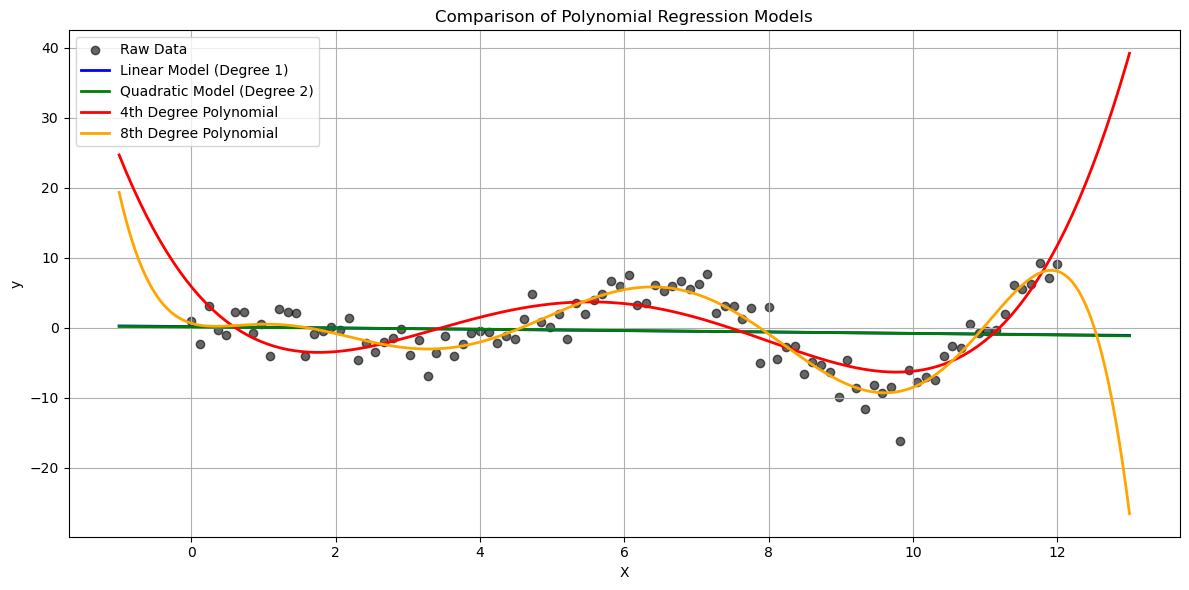

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Convert X to numpy array if it's a DataFrame
X_np = X.values.reshape(-1, 1)

# Linear Model (Degree 1)
lin_reg = LinearRegression()
lin_reg.fit(X_np, y)

# Polynomial Features (Degree 2)
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly2.fit_transform(X_np)
poly2_reg = LinearRegression()
poly2_reg.fit(X_poly2, y)

# Polynomial Features (Degree 4)
poly4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly4 = poly4.fit_transform(X_np)
poly4_reg = LinearRegression()
poly4_reg.fit(X_poly4, y)

# Polynomial Features (Degree 8)
poly8 = PolynomialFeatures(degree=8, include_bias=False)
X_poly8 = poly8.fit_transform(X_np)
poly8_reg = LinearRegression()
poly8_reg.fit(X_poly8, y)

# Predictions for plotting
X_range = np.linspace(X_np.min() - 1, X_np.max() + 1, 300).reshape(-1, 1)
y_lin_pred = lin_reg.predict(X_range)
y_poly2_pred = poly2_reg.predict(poly2.transform(X_range))
y_poly4_pred = poly4_reg.predict(poly4.transform(X_range))
y_poly8_pred = poly8_reg.predict(poly8.transform(X_range))

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for the raw data
plt.scatter(X, y, color='black', label='Raw Data', alpha=0.6)

# Line plots for different models
plt.plot(X_range, y_lin_pred, label='Linear Model (Degree 1)', color='blue', linewidth=2)
plt.plot(X_range, y_poly2_pred, label='Quadratic Model (Degree 2)', color='green', linewidth=2)
plt.plot(X_range, y_poly4_pred, label='4th Degree Polynomial', color='red', linewidth=2)
plt.plot(X_range, y_poly8_pred, label='8th Degree Polynomial', color='orange', linewidth=2)

# Adding labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Polynomial Regression Models')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Interpret Findings

Based on the metrics as well as the graphs, which model do you think is the best? Why?

### Your written answer here

**Best Model Recommendation:**
The 4th-degree polynomial model appears to be the best overall.

**Why?**
- Good balance of R² and model simplicity.
- Avoids overfitting seen in the 8th-degree model.
- Graphically captures the non-linear trends in the data without being too wiggly.
- More coefficients are likely to be statistically meaningful compared to degree 8.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
The quadratic model (polynomial degree 2) is definitely not the best based on all of the evidence we have. It has the worst R-Squared, the coefficient p-values are not significant, and you can see from the graph that there is a lot of variance in the data that it is not picking up on.

Our visual inspection aligns with the worse R-Squared for the 4th degree polynomial compared to the 8th degree polynomial. The 4th degree polynomial is flatter and doesn't seem to capture the extremes of the data as well.
    
However if we wanted to interpret the coefficients, then only the 4th degree polynomial has statistically significant results. The interpretation would be challenging because of the number of terms, but we could apply some calculus techniques to describe inflection points.

Overall it appears that this dataset is not particularly well suited to an inferential linear regression approach, even with polynomial transformations. So the "best" model could be either the 4th or 8th degree polynomial depending on which aspect of the model is more important to you, but either way it will be challenging to translate it into insights for stakeholders.
    
</details>

## Summary

Great job! You now know how to include polynomials in your linear models as well as the limitations of applying polynomial regression. 